<a href="https://colab.research.google.com/github/austincym/InclassActivities/blob/main/Homework_1_Cymerman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

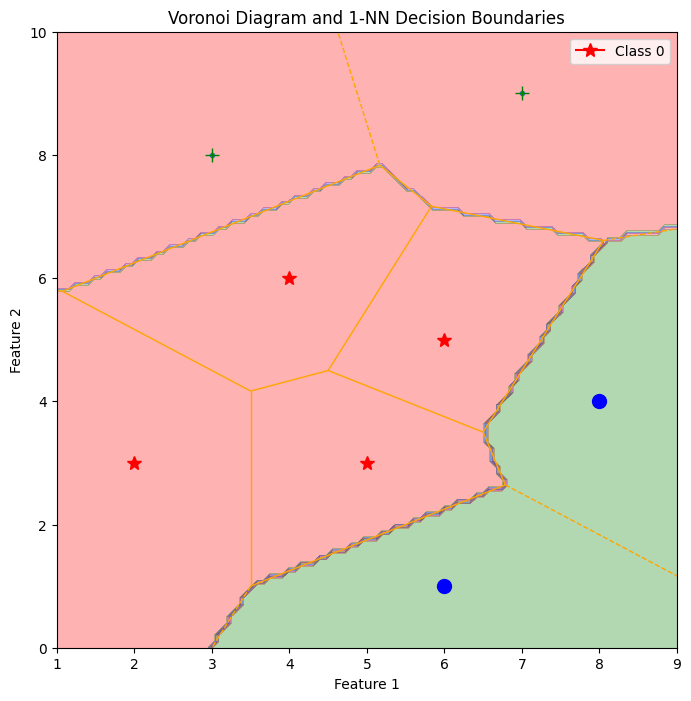

In [1]:
# Question 1
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import Voronoi, voronoi_plot_2d

# Define points
points = np.array([
    [2, 3], [4, 6], [5, 3], [6, 5],  # Red Star
    [3, 8], [7, 9],                   # Green Plus
    [8, 4], [6, 1]                    # Blue Circle
])

# Labels: 0 for Red Star, 1 for Green Plus, 2 for Blue Circle
labels = np.array([0, 0, 0, 0, 1, 1, 2, 2])

# Voronoi diagram
vor = Voronoi(points)
fig, ax = plt.subplots(figsize=(8, 8))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=1)

# Define color map for classes
colors = ['red', 'green', 'blue']
markers = ['*', '+', 'o']

# Plot class
for i, (point, label) in enumerate(zip(points, labels)):
    ax.plot(point[0], point[1], color=colors[label], marker=markers[label], markersize=10, label=f'Class {label}' if i == 0 else "")

# Training the 1-NN classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(points, labels)

# Mesh to plot decision boundary
x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Decision boundary
ax.contourf(xx, yy, Z, alpha=0.3, colors=colors)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title("Voronoi Diagram and 1-NN Decision Boundaries")
plt.show()

In [1]:
# Question 2
# Import libraries
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Define the dataset
# Columns represent x, y, and label
data = np.array([
    [3, 2, 1],  # Instance 1: (x=3, y=2), Label=True (1)
    [3, 4, 1],  # Instance 2: (x=3, y=4), Label=True (1)
    [2, 4, 1],  # Instance 3: (x=2, y=4), Label=True (1)
    [1, 2, 0],  # Instance 4: (x=1, y=2), Label=False (0)
    [2, 3, 0]   # Instance 5: (x=2, y=3), Label=False (0)
])

# Extract features and labels
X = data[:, :2]
y = data[:, 2]

# Test instance
test_instance = np.array([[2, 2.5]])

# Calculate Euclidean distances to each instance in the dataset
distances = np.linalg.norm(X - test_instance, axis=1)

# Print distances
print("Euclidean distances to each instance:")
for i, dist in enumerate(distances, start=1):
    print(f"Instance {i}: Distance = {dist:.2f}")

# Sort distances and get indices of the 3 nearest neighbors
nearest_neighbor_ids = distances.argsort()[:3]
print("\nIndices of the 3 nearest neighbors:", nearest_neighbor_ids + 1)

# Labels of the 3 nearest neighbors
nearest_labels = y[nearest_neighbor_ids]

# Determine class label based on majority vote
from collections import Counter
label_counts = Counter(nearest_labels)
predicted_label = label_counts.most_common(1)[0][0]

print("\nClass labels of the 3 nearest neighbors:", nearest_labels)
print("Predicted class label of the test instance using 3-NN classifier:", "True" if predicted_label == 1 else "False")


Euclidean distances to each instance:
Instance 1: Distance = 1.12
Instance 2: Distance = 1.80
Instance 3: Distance = 1.50
Instance 4: Distance = 1.12
Instance 5: Distance = 0.50

Indices of the 3 nearest neighbors: [5 1 4]

Class labels of the 3 nearest neighbors: [0 1 0]
Predicted class label of the test instance using 3-NN classifier: False


In [3]:
# Question 3
# Import libraries
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, f1_score

# Define the predicted probabilities and true labels
predicted_probabilities = np.array([0.8, 0.2, 0.4, 0.55, 0.45, 0.9, 0.3, 0.4, 0.56, 0.92])
true_labels = np.array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1])

t = 0.5

# Decision rule to classify instances
predicted_labels = (predicted_probabilities >= t).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate performance metrics
accuracy = accuracy_score(true_labels, predicted_labels)
balanced_accuracy = balanced_accuracy_score(true_labels, predicted_labels)
true_positive_rate = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])  # TP / (TP + FN)
false_positive_rate = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])  # FP / (FP + TN)
f1 = f1_score(true_labels, predicted_labels)

# Print calculated metrics
print("\nClassification Accuracy:", accuracy)
print("Balanced Classification Accuracy:", balanced_accuracy)
print("True Positive Rate:", true_positive_rate)
print("False Positive Rate:", false_positive_rate)
print("F1 Score:", f1)

# Discussion on threshold behavior
print("\nDiscussion:")
print("1. If we increase the threshold t beyond 0.5, fewer instances will be classified as '1'. This might lead to more False Negatives, as instances that could have been classified as '1' may now be classified as '0'.")
print("2. A larger threshold should be considered when the cost of false positives is high or when a more conservative classification is desired to minimize misclassification of the positive class.")


Confusion Matrix:
[[3 0]
 [2 5]]

Classification Accuracy: 0.8
Balanced Classification Accuracy: 0.8571428571428572
True Positive Rate: 0.7142857142857143
False Positive Rate: 0.0
F1 Score: 0.8333333333333334

Discussion:
1. If we increase the threshold t beyond 0.5, fewer instances will be classified as '1'. This might lead to more False Negatives, as instances that could have been classified as '1' may now be classified as '0'.
2. A larger threshold should be considered when the cost of false positives is high or when a more conservative classification is desired to minimize misclassification of the positive class.



Iteration 1:
Cluster memberships: [0 1 1 1]
Cluster centroids: [[1.         1.        ]
 [3.16666667 4.33333333]]

Iteration 2:
Cluster memberships: [0 0 1 1]
Cluster centroids: [[1.25 1.5 ]
 [4.   5.5 ]]


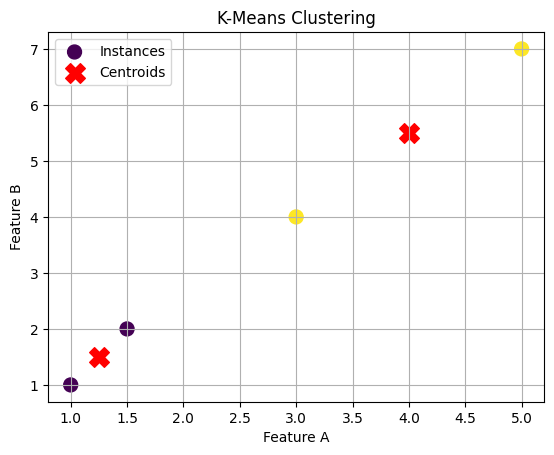

In [4]:
# Question 4
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the dataset
data = np.array([
    [1.0, 1.0],  # Instance 1
    [1.5, 2.0],  # Instance 2
    [3.0, 4.0],  # Instance 3
    [5.0, 7.0]   # Instance 4
])

# Initial cluster centroids
centroids = np.array([
    data[0],
    data[1]
])

# Function to assign clusters based on the closest centroid
def assign_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Function to update centroids
def update_centroids(data, labels, k):
    return np.array([data[labels == i].mean(axis=0) for i in range(k)])

# K-means clustering for 2 iterations
k = 2
for iteration in range(2):
    labels = assign_clusters(data, centroids)
    centroids = update_centroids(data, labels, k)

    # Display the results for the current iteration
    print(f"\nIteration {iteration + 1}:")
    print("Cluster memberships:", labels)
    print("Cluster centroids:", centroids)

# Plotting the results
plt.scatter(data[:, 0], data[:, 1], c=labels, s=100, cmap='viridis', marker='o', label='Instances')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature A')
plt.ylabel('Feature B')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Question 5
# Import libraries
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from numpy.linalg import svd

# Define the rating matrix
data = {
    'Item 1': [3.5, 2, 5, 3],
    'Item 2': [2, 3.5, 1, 4],
    'Item 3': [np.nan, 4, 1, 4.5],
    'Item 4': [4.5, np.nan, 3, np.nan],
    'Item 5': [5, 2, 5, 3]
}
ratings_matrix = pd.DataFrame(data, index=['Angelica', 'Bill', 'Chan', 'Dan'])

# Fill NaN with 0 for calculations
ratings_filled = ratings_matrix.fillna(0)

# Calculate the cosine similarity between items
item_similarity = cosine_similarity(ratings_filled.T)
item_similarity_df = pd.DataFrame(item_similarity, index=ratings_matrix.columns, columns=ratings_matrix.columns)

# Use only the ratings from users who rated Item 3
user_ratings_for_item_3 = ratings_filled['Item 3']
rated_users = user_ratings_for_item_3[user_ratings_for_item_3 != 0].index

# Calculate Angelica's estimated rating for Item 3 using the ratings of other items
similar_items = item_similarity_df['Item 3'][rated_users]
ratings_weighted = ratings_filled.loc[rated_users, ratings_filled.columns != 'Item 3']
weighted_sum = (similar_items.values[:, None] * ratings_weighted).sum(axis=0)
predicted_rating = weighted_sum / np.abs(similar_items).sum()

# Final predicted rating for Item 3
angelica_rating_item_3 = predicted_rating['Item 3']
ratings_matrix.loc['Angelica', 'Item 3'] = angelica_rating_item_3

# Output for item-based collaborative filtering
print("Angelica's estimated rating for Item 3 (Item-based CF):", angelica_rating_item_3)
print("\nFinal Rating Matrix after Item-based CF:")
print(ratings_matrix)

# b. User-based collaborative filtering to estimate Bill's rating for Item 4
# Calculate the cosine similarity between users
user_similarity = cosine_similarity(ratings_filled)
user_similarity_df = pd.DataFrame(user_similarity, index=ratings_matrix.index, columns=ratings_matrix.index)

# Use only the ratings from users who rated Item 4
item_4_ratings = ratings_filled['Item 4']
rated_users_item_4 = item_4_ratings[item_4_ratings != 0].index

# Calculate Bill's estimated rating for Item 4 using the ratings of other items
similar_users = user_similarity_df['Bill'][rated_users_item_4]
ratings_weighted_for_item_4 = ratings_filled.loc[rated_users_item_4, ratings_filled.columns != 'Item 4']
weighted_sum_for_bill = (similar_users.values[:, None] * ratings_weighted_for_item_4).sum(axis=0)
predicted_rating_bill = weighted_sum_for_bill / np.abs(similar_users).sum()

# Final predicted rating for Item 4
bill_rating_item_4 = predicted_rating_bill['Item 4']
ratings_matrix.loc['Bill', 'Item 4'] = bill_rating_item_4

# Output for user-based collaborative filtering
print("\nBill's estimated rating for Item 4 (User-based CF):", bill_rating_item_4)
print("\nFinal Rating Matrix after User-based CF:")
print(ratings_matrix)

# c. Matrix Factorization using SVD to estimate Angelica's rating for Item 3
# Perform SVD
U, sigma, Vt = svd(ratings_filled)

# Create diagonal matrix for sigma
sigma_matrix = np.zeros((U.shape[0], Vt.shape[0]))
np.fill_diagonal(sigma_matrix, sigma)

# Reconstruct the ratings matrix
reconstructed_matrix = np.dot(np.dot(U, sigma_matrix), Vt)

# Get the estimated rating for Angelica on Item 3
angelica_estimated_rating_item_3_svd = reconstructed_matrix[0, 2]  # 0 is the index for Angelica, 2 for Item 3
ratings_matrix.loc['Angelica', 'Item 3'] = angelica_estimated_rating_item_3_svd

# Output for matrix factorization
print("\nAngelica's estimated rating for Item 3 (SVD-based CF):", angelica_estimated_rating_item_3_svd)
print("\nFinal Rating Matrix after SVD-based CF:")
print(ratings_matrix)


Feature Map Output after Convolution:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Resulting Image after 2x2 Max Pooling:
[[0. 0.]]


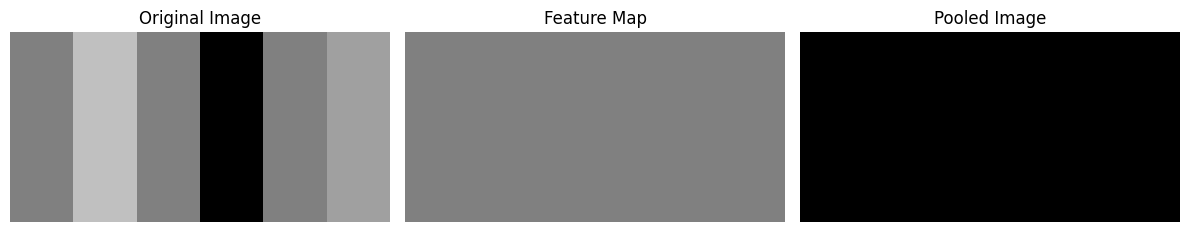


The filter (also known as a kernel) in Table 2 is designed to highlight differences in pixel intensity.
It does this by applying a convolution operation, which calculates a weighted sum of the pixel values in
a local region defined by the filter. In this case, the filter has negative weights for the upper row
and positive weights for the lower row, effectively detecting vertical edges in the image. As a result,
areas with high contrast will yield larger values in the feature map, while areas with low contrast will
yield smaller values.



In [5]:
# Question 6
# import
import numpy as np
import matplotlib.pyplot as plt

# Define the synthetic image (Table 1)
image = np.array([[4, 6, 4, 0, 4, 5],
                  [4, 6, 4, 0, 4, 5],
                  [4, 6, 4, 0, 4, 5]])

# Define the filter (Table 2)
filter_ = np.array([[-1, -1, -1],
                    [1, 1, 1]])

# Function to apply convolution
def apply_convolution(image, filter_):
    filter_height, filter_width = filter_.shape
    image_height, image_width = image.shape

    # Calculate output dimensions
    output_height = image_height - filter_height + 1
    output_width = image_width - filter_width + 1
    feature_map = np.zeros((output_height, output_width))

    # Apply convolution
    for i in range(output_height):
        for j in range(output_width):
            region = image[i:i+filter_height, j:j+filter_width]
            feature_map[i, j] = np.sum(region * filter_)

    return feature_map

# Apply filter to the image
feature_map = apply_convolution(image, filter_)
print("Feature Map Output after Convolution:")
print(feature_map)

# Function to apply 2x2 max pooling
def apply_max_pooling(feature_map):
    pooled_height = feature_map.shape[0] // 2
    pooled_width = feature_map.shape[1] // 2
    pooled_output = np.zeros((pooled_height, pooled_width))

    for i in range(pooled_height):
        for j in range(pooled_width):
            region = feature_map[i*2:(i+1)*2, j*2:(j+1)*2]
            pooled_output[i, j] = np.max(region)

    return pooled_output

# Apply max pooling to feature map
pooled_image = apply_max_pooling(feature_map)
print("\nResulting Image after 2x2 Max Pooling:")
print(pooled_image)

# Visualize the original image feature map and pooled image
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=8)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(feature_map, cmap='gray', vmin=-8, vmax=8)
axs[1].set_title('Feature Map')
axs[1].axis('off')

axs[2].imshow(pooled_image, cmap='gray', vmin=0, vmax=4)
axs[2].set_title('Pooled Image')
axs[2].axis('off')

plt.tight_layout()
plt.show()

# Explanation of the filter's role
explanation = """
The filter (also known as a kernel) in Table 2 is designed to highlight differences in pixel intensity.
It does this by applying a convolution operation, which calculates a weighted sum of the pixel values in
a local region defined by the filter. In this case, the filter has negative weights for the upper row
and positive weights for the lower row, effectively detecting vertical edges in the image. As a result,
areas with high contrast will yield larger values in the feature map, while areas with low contrast will
yield smaller values.
"""

print(explanation)


In [2]:
# Question 7
# Define parameters for each layer based on LeNet-5 architecture
# LeNet-5 architecture details:
# - C1: 6 filters of size 5x5
# - C3: 16 filters of size 5x5, connected to subsets of C1 feature maps
# - C5: fully connected layer with 120 feature maps (output size 1x1)
# - F6: fully connected layer with 84 units

# C1 Layer
C1_filters = 6           # Number of filters
C1_filter_size = (5, 5)  # Filter size is 5x5

# Calculate the number of weights for the C1 layer
C1_weights = C1_filters * C1_filter_size[0] * C1_filter_size[1]

# C3 Layer
C3_filters = 16          # Number of filters
C3_filter_size = (5, 5)  # Filter size is 5x5

# Calculate the number of weights for the C3 layer
C3_weights = C3_filters * C3_filter_size[0] * C3_filter_size[1] * C1_filters  # connected to subsets of C1 feature maps

# C5 Layer
C5_output_size = 120    # 120 feature maps with output size 1x1
C5_input_size = 16 * 5 * 5  # C5 receives input from 16 feature maps of size 5x5 in S4

# Calculate the number of weights for the C5 layer
C5_weights = C5_output_size * C5_input_size

# F6 Layer
F6_units = 84          # Fully connected layer with 84 units
F6_input_size = C5_output_size

# Calculate the number of weights for the F6 layer
F6_weights = F6_units * F6_input_size

# Print the results
print(f"C1 Layer: ")
print(f"- Name: Convolutional layer C1")
print(f"- Filter Size: {C1_filter_size}")
print(f"- Total Weight Values: {C1_weights}")

print("\nC3 Layer: ")
print(f"- Filter Size: {C3_filter_size}")
print(f"- Total Weight Values: {C3_weights}")

print("\nC5 Layer: ")
print(f"- Total Weight Values: {C5_weights}")

print("\nF6 Layer: ")
print(f"- Total Weight Values: {F6_weights}")


C1 Layer: 
- Name: Convolutional layer C1
- Filter Size: (5, 5)
- Total Weight Values: 150

C3 Layer: 
- Filter Size: (5, 5)
- Total Weight Values: 2400

C5 Layer: 
- Total Weight Values: 48000

F6 Layer: 
- Total Weight Values: 10080


In [3]:
# Question 8
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the model based on the provided Keras code
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 3)))  # Layer 1: Conv2D
model.add(MaxPooling2D((2, 2)))                                            # Layer 2: MaxPooling2D
model.add(Conv2D(64, (3, 3), activation="relu"))                           # Layer 3: Conv2D
model.add(MaxPooling2D((2, 2)))                                            # Layer 4: MaxPooling2D
model.add(Flatten())                                                       # Layer 5: Flatten
model.add(Dense(64, activation="relu"))                                    # Layer 6: Dense
model.add(Dense(10, activation="softmax"))                                 # Layer 7: Dense

# Print model summary to see layer details and number of parameters
model.summary()

# Explanation of output details for each layer
explanation = """
1. Diagram of the Designed Network:
The structure includes:
   - Conv2D layer with 32 filters of size (3,3), ReLU activation
   - MaxPooling2D layer with pool size (2,2)
   - Conv2D layer with 64 filters of size (3,3), ReLU activation
   - MaxPooling2D layer with pool size (2,2)
   - Flatten layer
   - Dense layer with 64 units, ReLU activation
   - Dense layer with 10 units, softmax activation (output layer)

2. Layer-by-layer details:
   - Conv2D Layer 1: Input size = (28, 28, 3), Output size = (26, 26, 32), Number of weights = 32 * (3*3*3 + 1) = 896
   - MaxPooling2D Layer 2: Input size = (26, 26, 32), Output size = (13, 13, 32), No weights
   - Conv2D Layer 3: Input size = (13, 13, 32), Output size = (11, 11, 64), Number of weights = 64 * (3*3*32 + 1) = 18,496
   - MaxPooling2D Layer 4: Input size = (11, 11, 64), Output size = (5, 5, 64), No weights
   - Flatten Layer 5: Input size = (5, 5, 64), Output size = (1600,), No weights
   - Dense Layer 6: Input size = 1600, Output size = 64, Number of weights = 1600 * 64 + 64 = 102,464
   - Dense Layer 7 (Output): Input size = 64, Output size = 10, Number of weights = 64 * 10 + 10 = 650

3. Pooling Layers:
   - MaxPooling2D Layer 2: Input size = (26, 26, 32), Output size = (13, 13, 32)
   - MaxPooling2D Layer 4: Input size = (11, 11, 64), Output size = (5, 5, 64)
"""

print(explanation)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,506 (478.54 KB)

 Trainable params: 122,506 (478.54 KB)

 Non-trainable params: 0 (0.00 B)


1. Diagram of the Designed Network:
The structure includes:
   - Conv2D layer with 32 filters of size (3,3), ReLU activation
   - MaxPooling2D layer with pool size (2,2)
   - Conv2D layer with 64 filters of size (3,3), ReLU activation
   - MaxPooling2D layer with pool size (2,2)
   - Flatten layer
   - Dense layer with 64 units, ReLU activation
   - Dense layer with 10 units, softmax activation (output layer)

2. Layer-by-layer details:
   - Conv2D Layer 1: Input size = (28, 28, 3), Output size = (26, 26, 32), Number of weights = 32 * (3*3*3 + 1) = 896
   - MaxPooling2D Layer 2: Input size = (26, 26, 32), Output size = (13, 13, 32), No weights
   - Conv2D Layer 3: Input size = (13, 13, 32), Output size = (11, 11, 64), Number of weights = 64 * (3*3*32 + 1) = 18,496
   - MaxPooling2D Layer 4: Input size = (11, 11, 64), Output size = (5, 5, 64), No weights
   - Flatten Layer 5: Input size = (5, 5, 64), Output size = (1600,), No weights
   - Dense Layer 6: Input size = 1600, Output size =